In [101]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imutils
from skimage import measure
from imutils import perspective

In [102]:
def plot_image(image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.show()

In [103]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

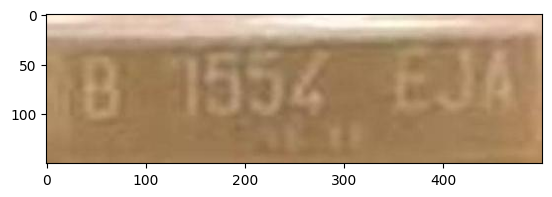

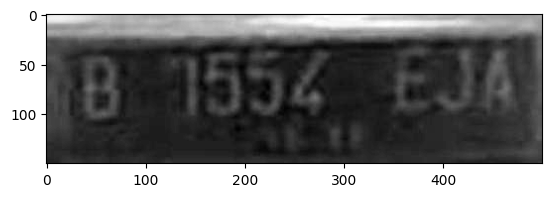

In [104]:
# img_path = './data-modified/train/TEST.jpg'
img_path = './data-modified-resized/train/data/DataTrain10.jpg'
# img_path = './data-modified-resized/test/data/DataTest20.jpg'
# img_path = './Data/Data Test for BDC 2023 - Penyisihan/data/DataTest20.png'
# img_path = './Data/Data Train for BDC 2023 - Penyisihan/data/DataTrain21.png'

img = cv2.imread(img_path)

height, width, channel = img.shape

# img = cv2.resize(img, (int(img.shape[1]*2),int(img.shape[0]*2)))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# gray_resized = cv2.resize(gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)
# gray = cv2.GaussianBlur(gray, (7,7), 0)
plot_image(img)
plot_image(gray, 'gray')

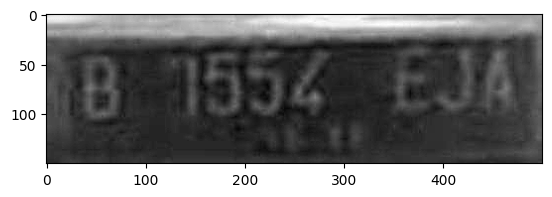

In [105]:
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

plot_image(gray, 'gray')

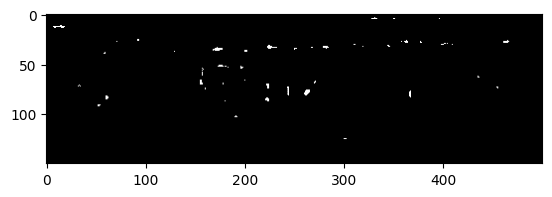

In [106]:
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plot_image(img_thresh, 'gray')

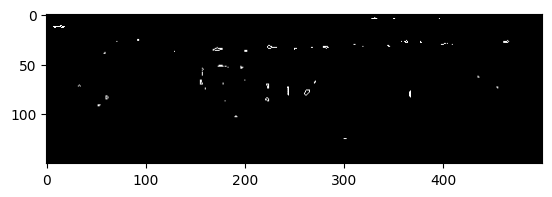

In [107]:
contours, _= cv2.findContours(
    img_thresh, 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))

plot_image(temp_result, 'gray')

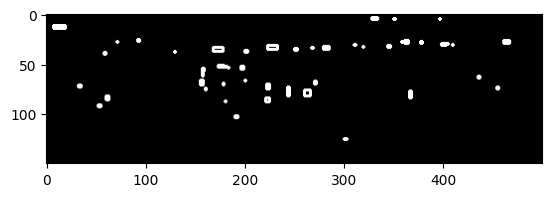

In [108]:
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
    
    # insert to dict
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })
    
plot_image(temp_result)

In [109]:
# SEPARATOR

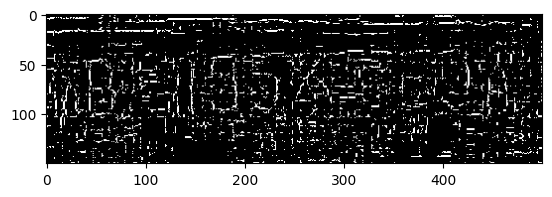

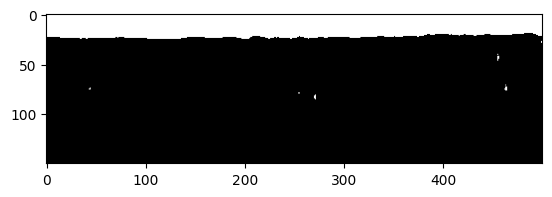

In [110]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

# gray = cv2.erode(gray, None, iterations=1)

img_opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
img_norm = gray - img_opening
# plot_image(img_norm, 'gray')

(thresh, img_norm_bw) = cv2.threshold(img_norm, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
(thresh, img_without_norm_bw) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plot_image(img_norm_bw, 'gray')
plot_image(img_without_norm_bw, 'gray')

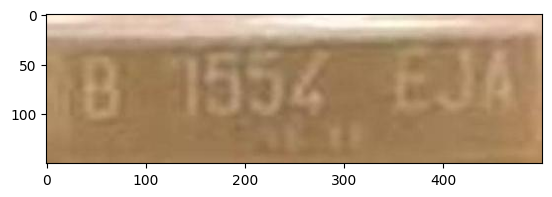

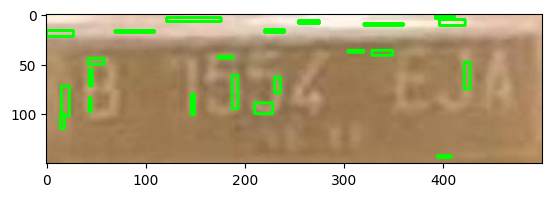

In [111]:
cnts = cv2.findContours(img_norm_bw.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]

img_test = img.copy()

for c in cnts:
    if cv2.contourArea(c) > 10:
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(img_test, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi = gray[y:y + h, x:x + w]
    thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
    
plot_image(img)
plot_image(img_test)

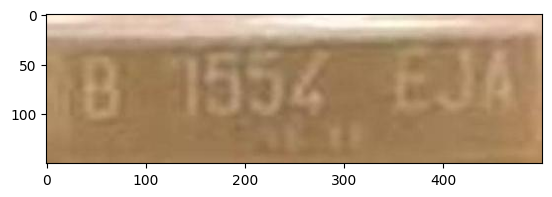

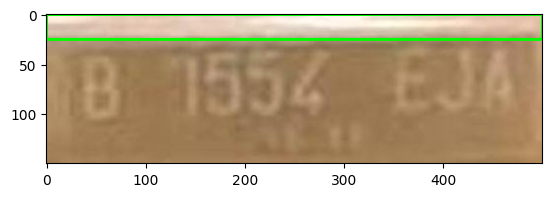

In [112]:
cnts = cv2.findContours(img_without_norm_bw.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]

img_test = img.copy()

for c in cnts:
    if cv2.contourArea(c) > 10:
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(img_test, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi = gray[y:y + h, x:x + w]
    thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
    
plot_image(img)
plot_image(img_test)